In [1]:
import numpy as np
from scipy.integrate import trapz
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('rainbow')
%matplotlib

Using matplotlib backend: Qt5Agg


## For the low salt regime 
(see */home/joey/Documents/bedzyk_research_group/papers/published/K1_PNAS_SI_2018_MJB.docx* 
**equation S18**, it is an expansion of the exponential in equation S11):

$$u=\frac{U_{ribbon}}{V}=\Big(\frac{2 N_T^2}{VA}\Big)k_B T l_B\Big[\frac{-A}{\lambda_d}+\int_{0}^{\sqrt{A\chi}}\ln\Big(\frac{\sqrt{\frac{A}{\chi}}}{a}+\sqrt{1+\frac{A}{\chi a^2}}\Big)da\Big]+\frac{2\gamma\Big(\sqrt{\frac{A}{\chi}}+\sqrt{A\chi}\Big)}{A}$$
or we can write (in terms of $\rho$)
$$\frac{U_{ribbon}}{V}=\Big(\frac{2 \rho^2 V}{A}\Big)k_B T l_B\Big[\frac{-A}{\lambda_d}+\int_{0}^{\sqrt{A\chi}}\ln\Big(\frac{\sqrt{\frac{A}{\chi}}}{a}+\sqrt{1+\frac{A}{\chi a^2}}\Big)da\Big]+\frac{2\gamma\Big(\sqrt{\frac{A}{\chi}}+\sqrt{A\chi}\Big)}{A}$$
$$\rho = 2\alpha\frac{\frac{1 \text{"charge"}}{\text{APL}}}{\delta}$$
$$\text{APL}\times\delta\simeq\text{VPL}$$
or also (in terms of $\sigma$)
$$\frac{U_{ribbon}}{V}=\Big(\frac{2 \sigma^2 A}{V}\Big)k_B T l_B\Big[\frac{-A}{\lambda_d}+\int_{0}^{\sqrt{A\chi}}\ln\Big(\frac{\sqrt{\frac{A}{\chi}}}{a}+\sqrt{1+\frac{A}{\chi a^2}}\Big)da\Big]+\frac{2\gamma\Big(\sqrt{\frac{A}{\chi}}+\sqrt{A\chi}\Big)}{A}$$
$$\sigma = \frac{\alpha}{\text{APL}}$$
$$\alpha\equiv\text{charge fraction}$$
#### Every lipid is assumed to be charged, then $\alpha$, charge fraction, adjusts the total charge

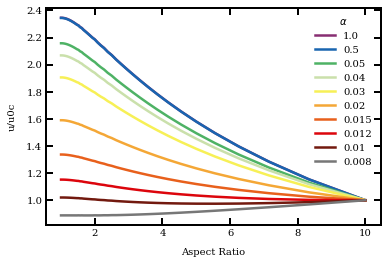

In [2]:
# length and width of ribbon
l=0.1
ws=np.arange(0.01,l,0.002)

# membrane parameters
A = 2*10**(-13) #area
kbT=4.1*10**(-21) #kbT at 300K
delta = 4*10**(-9) #thickness
vol = A*delta #volume
charge_fraction=[1,0.5,0.05,0.04,0.03,0.02,0.015,0.012,0.01,0.008]
rhos = [alpha*(2/50)*10**(20)/delta for alpha in charge_fraction] # charge density of membrane e/m^3
lb = 0.7*10**(-9) #bjeerum length
gamma = 7.2*10**(-2) #surface tension
ld = 0.5*10**(-6)#debye length 500nm (very low salt)
chi = [w/l for w in ws]#chi = (w/L), inverse of aspect ratio

def prefactor(A):
    return 2*rho**2*vol*lb*kbT/A

def integrand(chi,A,a):
    return prefactor(A)*np.log(np.sqrt(A/chi)/a + np.sqrt(1+A/(chi*a**2)))

def Uribbon1(A,ld):
    return prefactor(A)*(-A/ld)

def Uribbon2(chi,A): 
    #interface term for surface tension
    #no dependence on charge
    return (2*gamma*(np.sqrt(A/chi)+np.sqrt(A*chi)))/A

scale=0
for rho in rhos:
    integral_term=[]
    energy_dens=[]
    energy_dens2=[]
    for c in chi:
        little_as=np.arange(0,np.sqrt(A*c),np.sqrt(A*c)/1000)
        l1=[integrand(c,A,x) for x in little_as[1:]]
#         if c == chi[0]:
#             print()
#             print(trapz(l1,little_as[1:]))
#             print(Uribbon1(A,ld))
#             print(Uribbon2(c,A))
#             print()
        integral_term.append(trapz(l1,little_as[1:]))
        energy_dens.append((Uribbon1(A,ld)+Uribbon2(c,A)+trapz(l1,little_as[1:])))
        energy_dens2.append((Uribbon1(A,ld)+trapz(l1,little_as[1:])))
    ar=[1/c for c in chi]
    #energy_dens[0] is the energy_dens corresponding to chi[0] for each respective rho (u0c)
    plt.plot(ar,energy_dens/energy_dens[0],label=round(rho/rhos[0],3))
    plt.xlabel('Aspect Ratio')
    plt.ylabel('u/u0c')
    plt.legend(title="$\\alpha$")
    #plt.plot(chi,energy_dens2/energy_dens2[0])


## Using Eq S11, no exponential expansions
(see */home/joey/Documents/bedzyk_research_group/papers/published/K1_PNAS_SI_2018_MJB.docx* )

Interface term is the same. Electrostatic term changes

$$U_E \propto 2\Big(\frac{N_T}{V}\Big)^2 A\delta^2 k_BT l_B\int_0^W\int_0^L\frac{e^{\frac{-\sqrt{x^2+y^2}}{\lambda_D}}}{\sqrt{x^2+y^2}}dxdy$$
Let $x_r=\frac{x}{\lambda_D}, y_r=\frac{y}{\lambda_D}$, $dx_r = \frac{dx}{\lambda_D}$, $dy_r = \frac{dy}{\lambda_D}$
$$=2\Big(\frac{N_T}{V}\Big)^2 A \delta^2 k_BT l_B l_D\int_0^{W/l_D}\int_0^{L/l_D}\frac{e^{-\sqrt{x_r^2+y_r^2}}}{\sqrt{x_r^2+y_r^2}}dx_rdy_r$$
$$\implies u_E = U_E/V$$

100%|██████████| 500/500 [00:25<00:00, 19.64it/s]


Text(0, 0.5, 'AR')

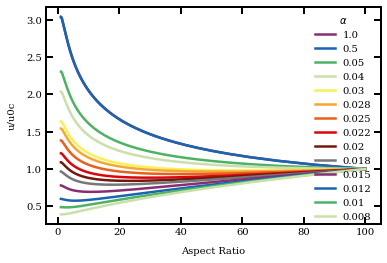

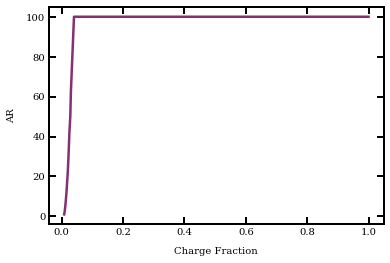

In [12]:
# Non approximated model

# membrane parameters
A = 2*10**(-13) #area
kbT=4.1*10**(-21) #kbT at 300K
delta = 4*10**(-9) #thickness
vol = A*delta #volume
charge_fraction=[1,0.5,0.05,0.04,0.03,0.028,0.025,0.022,0.02,0.018,0.015,0.012,0.01,0.008]
rhos = [alpha*(2/50)*10**(20)/delta for alpha in charge_fraction] # charge density of membrane e/m^3
lb = 0.7*10**(-9) #bjeerum length
gamma = 7.2*10**(-2) #surface tension
ld = 0.5*10**(-6)#debye length 500nm (very low salt)
chi = np.linspace(0.01,1,500) #chi = (w/L), inverse of aspect ratio

def prefactor2(A):
    return 2*rho**2*lb*A*delta**2*kbT*ld/vol

def integrand_electrostatic(A,x,y):
    # Having problems with the prefactor, make sure you know which to use/is correct
    return prefactor2(A)*np.exp(-np.sqrt(x**2+y**2))/(np.sqrt(x**2+y**2))


min_list=[]
for rho in rhos:
    integral_term=[]
    energy_dens=[]
    for c in tqdm(chi):
        width = np.sqrt(c)*np.sqrt(A)/ld #relative width to the deybe length
        length=np.sqrt(A)/np.sqrt(c)/ld #relative length to the deybe length
        xs = np.arange(length/1000,length,length/100)
        ys = np.arange(width/1000,width,width/100)
        integral_y=[]
        for x in xs:
            l1=[]
            for y in ys:
                l1.append(integrand_electrostatic(A,x,y))
            integral_y.append(trapz(l1,ys))
        integral_term = trapz(integral_y,xs)
        energy_dens.append((Uribbon2(c,A)+integral_term))
    ar=[1/c for c in chi]
    #energy_dens[0] is the energy_dens corresponding to chi[0] for each respective rho (u0c)
    plt.plot(ar,energy_dens/energy_dens[0],label=round(rho/rhos[0],3))
    #result=np.min(energy_dens/energy_dens[0])
    result = np.where(energy_dens/energy_dens[0]==np.min(energy_dens/energy_dens[0]))[0][0]
    min_list.append(result)
    plt.xlabel('Aspect Ratio')
    plt.ylabel('u/u0c')
    plt.legend(title="$\\alpha$")

plt.figure()
ar_min = [1/chi[i] for i in min_list]
plt.plot(charge_fraction,ar_min)
plt.xlabel('Charge Fraction')
plt.ylabel('AR')

(0, 0.1)

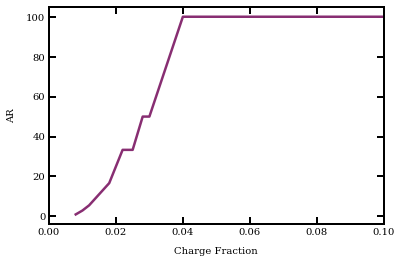

In [11]:
plt.figure()
ar_min = [1/chi[i] for i in min_list]
plt.plot(charge_fraction,ar_min)
plt.xlabel('Charge Fraction')
plt.ylabel('AR')
plt.xlim(0,0.1)

In [13]:
min_list

[0, 0, 0, 0, 3, 5, 7, 12, 17, 23, 41, 85, 169, 499]

In [5]:
# #discrete site model
# def r(a,b,ap,bp):
#     return np.sqrt((ap-a)**2+(bp-b)**2)

# n=10
# energy_rhos=[]
# for rho in tqdm(rhos):
#     #print(ld)
#     integrals=[]
#     for w in ws:
#         c=w/l
#         xs=np.arange(0,w,w/n/c)
#         ys=np.arange(0,l,l/n*c)
#         xps=np.arange(0,w,w/n/c)
#         #print(len(xps))
#         yps=np.arange(0,l,l/n*c)
#         #print(len(yps))
#         fourth=[]
#         for x in xs:
#             third=[]
#             for y in ys:
#                 second=[]
#                 for xp in xps:
#                     first=[]
#                     for yp in yps:
#                         if r(x,y,xp,yp)!=0:
#                             first.append(np.exp(-r(x,y,xp,yp)/ld)/r(x,y,xp,yp))
#                         else:
#                             first.append(0)
#                     second.append(trapz(first,yps))
#                 third.append(trapz(second,xps))
#             fourth.append(trapz(third,ys))
#         #integrals=trapz(fourth,xs)
#         integrals.append(trapz(fourth,xs)+2*gamma*delta*(l+w))
#     #plt.scatter([l/w for l in ls],integrals)
#     energy_rhos.append(integrals)
#     plt.plot([l/w for w in ws],integrals/integrals[0],label=round(rho/rhos[0],3))
#     plt.xlabel('Aspect Ratio')
#     plt.ylabel('u/u0c')
#     plt.legend(title="$\\alpha$")
                